# Random Search
> In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp]
- image: 

In [15]:
import numpy as np
import pandas as pd

## Introducting Random Search
- Similar to grid search:
    - Define an estimator, which hyperparameters to tune and the range of values for each hyperparameter.
    - Set a Cross-Validation scheme and scoring function
> Note -  This paper shows empirically and theoretically that randomly chosen trials are more efficient for hyperparmeter optimization than trials on a grid search (Bengio & Bergstra (2012))
- Two main reason:
    1. Not every hyperparameter is as important
    2. A little trick of probability

### Randomly Sample Hyperparameters
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search.

You will use just the hyperparameters `learning_rate` and `min_samples_leaf` of the GBM algorithm to keep the example illustrative and not overly complicated.

In [16]:
from itertools import product
from pprint import pprint

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a randomsearch
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 
                                             30, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
pprint(combinations_random_chosen)

[[1.455075376884422, 39],
 [0.12979899497487438, 35],
 [1.1705527638190953, 30],
 [0.40683417085427137, 13],
 [0.09984924623115578, 10],
 [0.12979899497487438, 39],
 [0.36190954773869344, 11],
 [1.350251256281407, 19],
 [0.5565829145728644, 22],
 [0.9758793969849247, 35],
 [1.200502512562814, 15],
 [1.4026633165829145, 22],
 [1.1930150753768844, 31],
 [1.0657286432160804, 39],
 [1.1930150753768844, 13],
 [0.30201005025125627, 37],
 [1.200502512562814, 23],
 [0.6988442211055276, 35],
 [1.1705527638190953, 13],
 [0.5715577889447236, 23],
 [0.9384422110552764, 30],
 [1.4925125628140703, 18],
 [0.8635678391959799, 40],
 [0.7437688442211056, 33],
 [0.7662311557788944, 29],
 [0.5341206030150754, 34],
 [1.1181407035175879, 30],
 [0.27954773869346733, 39],
 [0.3244723618090452, 39],
 [0.7138190954773869, 23]]


### Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters `criterion`, `max_depth` and `max_features` of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

In [17]:
import random

# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# Create a list of values for the max_dep hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
combinations_list = [list(x)  for x in product(criterion_list, max_feature_list, max_depth_list)]

# Cample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 30)

# Print the result
pprint(combinations_random_chosen)

[['gini', 'auto', 30],
 ['entropy', 'sqrt', 44],
 ['entropy', 'auto', 13],
 ['entropy', None, 51],
 ['gini', 'auto', 13],
 ['entropy', 'sqrt', 31],
 ['gini', 'sqrt', 49],
 ['gini', 'log2', 46],
 ['gini', 'sqrt', 21],
 ['entropy', 'sqrt', 17],
 ['gini', None, 15],
 ['gini', 'auto', 11],
 ['entropy', 'auto', 31],
 ['gini', None, 32],
 ['entropy', 'sqrt', 19],
 ['gini', 'auto', 37],
 ['entropy', 'sqrt', 24],
 ['entropy', 'auto', 44],
 ['entropy', None, 26],
 ['gini', None, 18],
 ['entropy', None, 47],
 ['entropy', None, 46],
 ['entropy', 'sqrt', 39],
 ['gini', None, 48],
 ['gini', 'log2', 39],
 ['gini', 'log2', 53],
 ['entropy', None, 24],
 ['entropy', 'sqrt', 9],
 ['gini', 'log2', 7],
 ['entropy', None, 22]]


### Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function `sample_and_visualize_hyperparameters()` takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

In [18]:
import matplotlib.pyplot as plt

def sample_and_visualize_hyperparameters(n_samples):
    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot 
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 1.5])
    plt.gca().set_ylim([10, 29])

4000


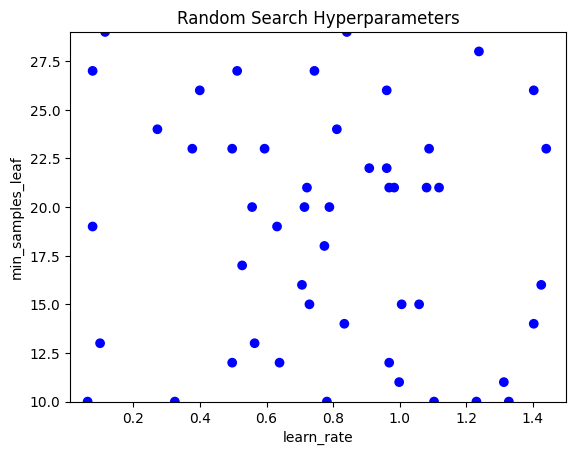

In [19]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 30))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(50)

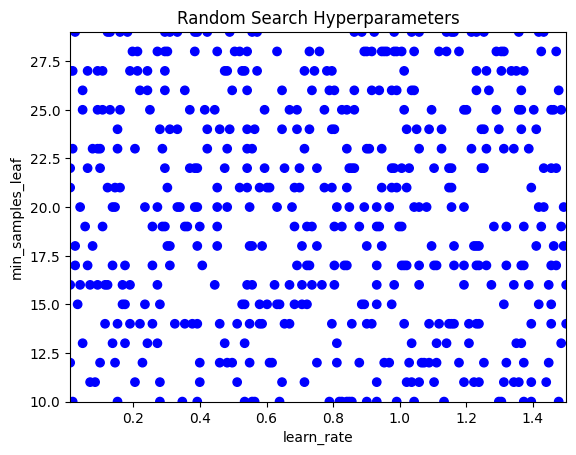

In [20]:
# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(500)

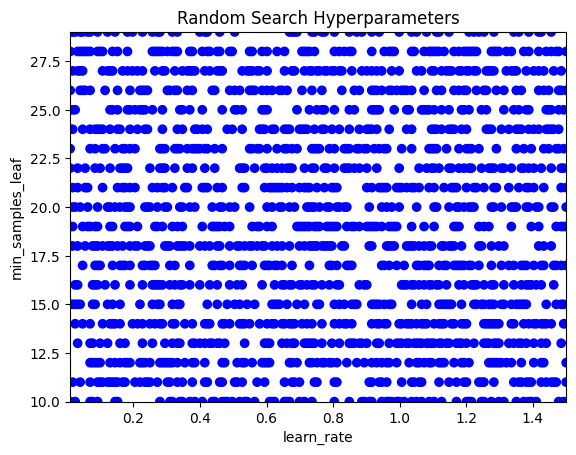

In [21]:
# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(1500)

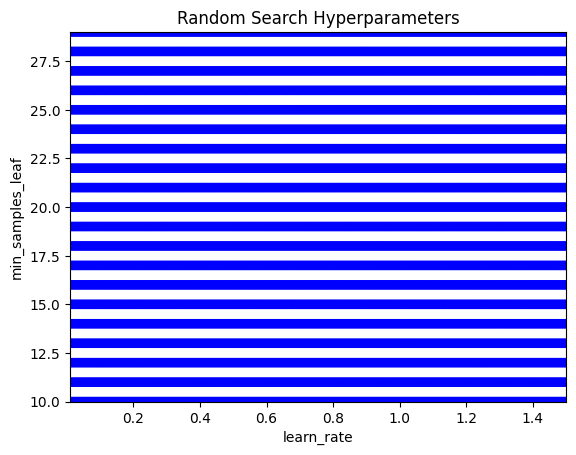

In [22]:
# Sample all the hyperparameter combinations & visualize
sample_and_visualize_hyperparameters(number_combs)

4000


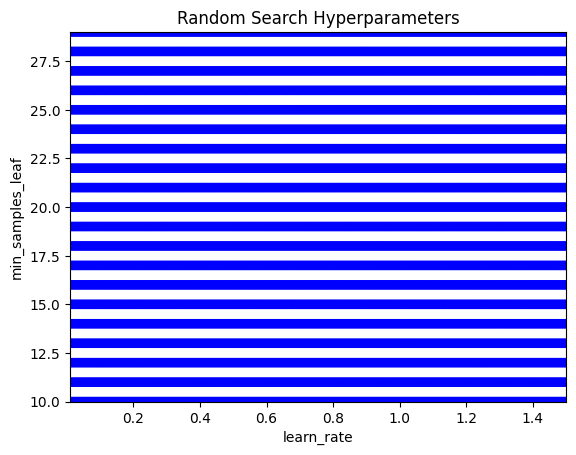

In [23]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

## Random Search in Scikit Learn
- Comparing to GridSearchCV
    1. Decide an algorithm/estimator
    2. Define which hyperparameters we will tune
    3. Define a range of values for each hyperparameter
    4. Setting a Cross-Validation scheme
    5. Define a score function
    6. Include extra useful information or function
- In Random Search,
    7. Decide how many samples to take and sample it

### The RandomizedSearchCV Object
Just like the `GridSearchCV` library from Scikit Learn, `RandomizedSearchCV` provides many useful features to assist with efficiently undertaking a random search. You're going to create a `RandomizedSearchCV` object, making the small adjustment needed from the `GridSearchCV` object.

The desired options are:

- A default Gradient Boosting Classifier Estimator
- 5-fold cross validation
- Use accuracy to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores
- Randomly sample 10 models

The hyperparameter grid should be for `learning_rate` (150 values between 0.1 and 2) and `min_samples_leaf` (all values between and including 20 and 64).

In [24]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('./dataset/credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 
              'min_samples_leaf': list(range(20, 65))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy', n_jobs=4, cv=5, refit=True, return_train_score=True
)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.8906040268456376 0.9288590604026845 1.8724832214765101
 1.7449664429530203 0.32953020134228184 1.3751677852348994
 1.1838926174496645 0.7248322147651006 1.7322147651006712
 0.8906040268456376]
[39 25 54 44 56 22 61 33 26 28]


### RandomizedSearchCV in Scikit Learn
Let's practice building a `RandomizedSearchCV` object using Scikit Learn.

The hyperparameter grid should be for `max_depth` (all values between and including 5 and 25) and `max_features` ('auto' and 'sqrt').

The desired options for the `RandomizedSearchCV` object are:

- A RandomForestClassifier Estimator with `n_estimators` of 80.
- 3-fold cross validation (`cv`)
- Use `roc_auc` to score the models
- Use 4 cores for processing in parallel (`n_jobs`)
- Ensure you refit the best model and return training scores
- Only sample 5 models for efficiency (`n_iter`)

Remember, to extract the chosen hyperparameters these are found in `cv_results_` with a column per hyperparameter. For example, the column for the hyperparameter `criterion` would be `param_criterion`.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26)), 'max_features': ['auto', 'sqrt']}

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=80),
    param_distributions=param_grid, n_iter=5,
    scoring='roc_auc', n_jobs=4, cv=3, refit=True, return_train_score=True
)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

[7 14 6 23 13]
['sqrt' 'sqrt' 'sqrt' 'auto' 'sqrt']


## Comparing Grid and Random Search
- Comparision

| Grid Search | Random Search |
| ----------- | ------------- |
| Exhaustively tries all combinations within the sample space | Random Selects a subset of combinations within the sample space (that you must specify) |
| No sampling methodology | Can select a sampling methodology (other than uniform) |
| More computationally expensive | Less computationally expensive |
| Guaranteed to find the best score in the sample space | Not guaranteed to find the best score in the sample space (but likely to find a good one fater) |

### Grid and Random Search Side by Side
Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

In [27]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 3.0])
    plt.gca().set_ylim([5, 25])

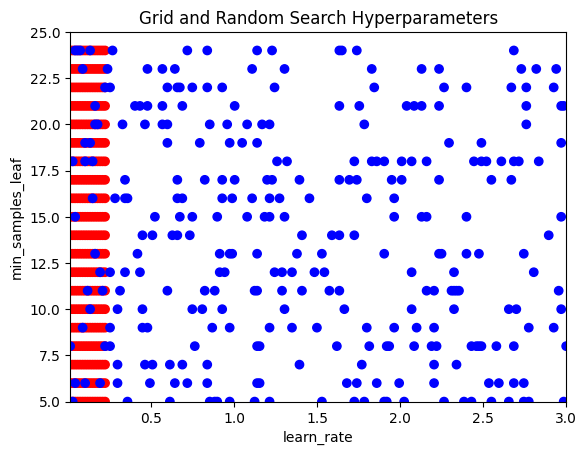

In [28]:
learn_rate_list = np.linspace(0.01, 3.0, 200)
min_samples_leaf_list = range(5, 25)

combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0, len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)